# Visualize aste1080 grid

find the boundaires of this regional domain, and visualize the state

**NOTE:** Using branch *aste1080* of **xmitgcm** package

In [1]:
import numpy as np
import xarray as xr
import xmitgcm
import ecco_v4_py as ecco

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [2]:
scr2Dir = '/scratch2/ivana'

asteGRID=f'{scr2Dir}/grids/aste1080/GRID/'
asteData=f'{scr2Dir}/data/aste1080/'
asteTS=f'{asteData}diags/STATE/'

### Load tile<>.mitgrid info

In [3]:
meta = xmitgcm.utils.get_extra_metadata(domain='aste1080', nx=1080)
meta

{'has_faces': True,
 'ny': 4140,
 'nx': 1080,
 'ny_facets': [1260, 0, 1080, 540, 1260],
 'pad_before_y': [900, 0, 0, 0, 0],
 'pad_after_y': [0, 0, 0, 540, 900],
 'face_facets': [0, 0, 2, 3, 4, 4],
 'facet_orders': ['C', 'C', 'C', 'F', 'F'],
 'face_offsets': [0, 1, 0, 0, 0, 1],
 'transpose_face': [False, False, False, True, True, True]}

In [4]:
ds = xmitgcm.open_mdsdataset(asteTS, asteGRID, 
                                   geometry='llc',
                                   nx=1080,
                                   extra_metadata=meta,
                                   delta_t=1200,
                                   ref_date='2000-01-01')

In [5]:
ds

<xarray.Dataset>
Dimensions:    (face: 6, i: 1080, i_g: 1080, j: 1080, j_g: 1080, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 168)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * i_g        (i_g) int64 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * j          (j) int64 0 1 2 3 4 5 6 7 ... 1073 1074 1075 1076 1077 1078 1079
  * j_g        (j_g) int64 0 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077 1078 1079
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 82 83 84 85 86 87 88 89 90
  * face       (face) int64 0 1 2 3 4 5
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2000-06-04 2000-10-22 ... 2069-12-29
    XC         (face, j, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    YC         (face, j, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    XG         (face, j_g, i_g) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    YG         (face, j_g, i_g) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    CS         (face, j, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    SN         (face, j, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    Z          (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    Zp1        (k_p1) >f4 dask.array<chunksize=(91,), meta=np.ndarray>
    Zu         (k_u) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    Zl         (k_l) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    rA         (face, j, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    dxG        (face, j_g, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    dyG        (face, j, i_g) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    Depth      (face, j, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    rAz        (face, j_g, i_g) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    dxC        (face, j, i_g) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    dyC        (face, j_g, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    rAw        (face, j, i_g) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    rAs        (face, j_g, i) >f4 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    drC        (k_p1) >f4 dask.array<chunksize=(91,), meta=np.ndarray>
    drF        (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    PHrefC     (k) >f4 dask.array<chunksize=(90,), meta=np.ndarray>
    PHrefF     (k_p1) >f4 dask.array<chunksize=(91,), meta=np.ndarray>
    hFacC      (k, face, j, i) >f4 dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    hFacW      (k, face, j, i_g) >f4 dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    hFacS      (k, face, j_g, i) >f4 dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskC      (k, face, j, i) bool dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskW      (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskS      (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskCtrlC  (k, face, j, i) bool dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskCtrlS  (k, face, j_g, i) bool dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskCtrlW  (k, face, j, i_g) bool dask.array<chunksize=(1, 1, 1080, 1080), meta=np.ndarray>
    maskInC    (face, j, i) bool dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    maskInS    (face, j_g, i) bool dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    maskInW    (face, j, i_g) bool dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    rhoRef     (k) >f4 d

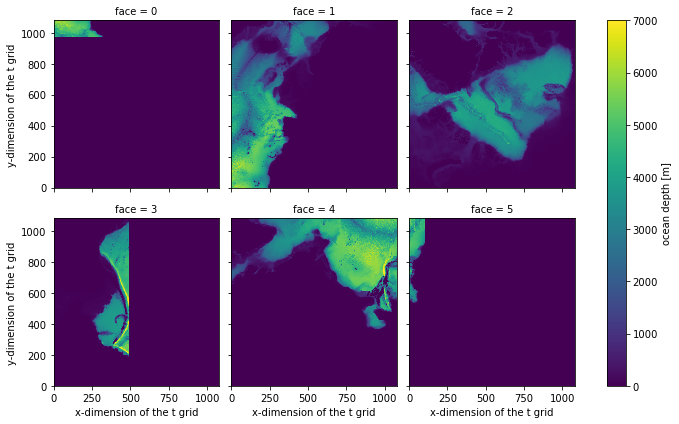

In [6]:
ds.Depth.plot(col='face', col_wrap=3)

-179.875 139.875
-180.0 140.0
-89.875 89.875
-90.0 90.0
140.1257961320755 179.87421386792454
140.00001 180.0
-89.875 89.875
-90.0 90.0


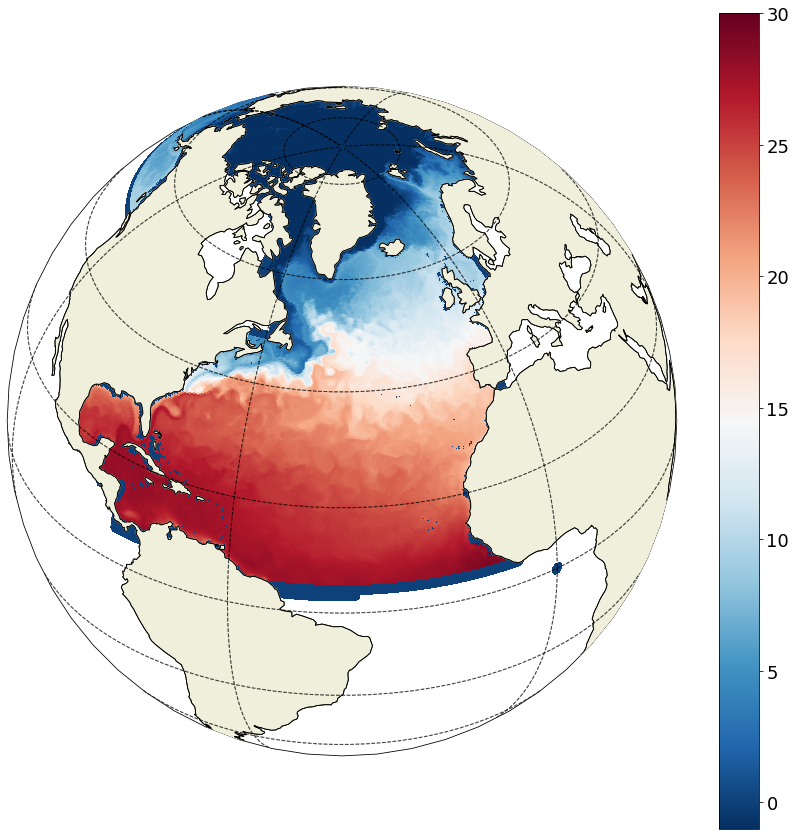

In [7]:
plt.rcParams.update({'figure.figsize':(15,15),'font.size':18})
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,ds.THETA.isel(k=10,time=-1),
                              show_colorbar=True,#cmap='YlOrRd',
                              projection_type='ortho',
                              cmin=-1,cmax=30,
                              user_lon_0=-40,
                              user_lat_0=35 );

## Save file

**WARNING:** Try saving a subset becasue the entire dataset is $\mathcal{O}$(10 TB)

In [ ]:
##ds.to_netcdf('%s/aste1080.nc' % asteData)